In [2]:
import pandas as pd
import sys

sys.path.append('../../')
from src.transform import load_json,transform_diff_avg,transform_diff_experiments
from src.plot_helpers import plot_experiment_range,plot_correlation_matrix,plot_boxplot

indoors_cols = load_json("../../json/locations.json")["wings_indoors"]

In [3]:
df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)
df_air_indoor = pd.read_csv('../../data/clean_data/airwings.csv',index_col=0,parse_dates=True)

df_air_indoor = df_air_indoor.loc[(df_air_indoor['sensor'] == 'air_wings_indoor') | (df_air_indoor['sensor'] == 'air_wings_indoor_ref'), indoors_cols]

df_air_indoor.rename(columns={'device_id': 'sensor'}, inplace=True)
df_air_indoor['sensor'] = 'AWI_indoor_' + df_air_indoor['sensor'].astype(str)

df_air_indoor

/tmp/ipykernel_1965302/3833256816.py:1: DtypeWarning: Columns (6,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)


co2     tvoc   co  pm_1.0  pm_2.5  pm_10  \
datetime                                                            
2024-10-16 05:00:43   657.32     0.00  0.5    2.15    2.27   2.24   
2024-10-16 05:01:43   657.32     0.00  0.5    2.15    2.25   2.23   
2024-10-16 05:02:43   657.31     0.00  0.5    2.13    2.24   2.22   
2024-10-16 05:03:43   657.31     0.00  0.5    2.05    2.15   2.13   
2024-10-16 05:04:43   657.31     0.00  0.5    2.00    2.11   2.09   
...                      ...      ...  ...     ...     ...    ...   
2024-10-20 23:36:15  1053.40  1217.67  0.5   36.02   38.17  38.26   
2024-10-20 23:41:15  1054.87  1224.10  0.5   36.10   38.21  38.25   
2024-10-20 23:46:16  1055.30  1226.17  0.5   36.24   38.34  38.35   
2024-10-20 23:51:16  1056.97  1233.67  0.5   36.84   38.96  38.97   
2024-10-20 23:56:17  1060.37  1248.20  0.5   36.93   39.16  39.30   

                     temperature  humidity  pressure            sensor  
datetime                                                                
2024-10-16 05:00:43        26.60      33.0   1010.26    AWI_indoor_2.0  
2024-10-16 05:01:43        26.60      33.0   1010.28    AWI_indoor_2.0  
2024-10-16 05:02:43        26.60      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:03:43        26.59      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:04:43        26.59      33.0   1010.31    AWI_indoor_2.0  
...                          ...       ...       ...               ...  
2024-10-20 23:36:15        26.49      41.0   1017.03  AWI_indoor_316.0  
2024-10-20 23:41:15        26.49      41.0   1017.02  AWI_indoor_316.0  
2024-10-20 23:46:16        26.48      41.0   1017.05  AWI_indoor_316.0  
2024-10-20 23:51:16        26.46      41.0   1016.99  AWI_indoor_316.0  
2024-10-20 23:56:17        26.45      41.0   1017.04  AWI_indoor_316.0  

[81753 rows x 10 columns]

In [4]:
temperature_full = pd.concat([df_air_indoor[["temperature","sensor"]],df[["temperature","sensor"]]],axis=0)
temperature_full


temperature          sensor
datetime                                        
2024-10-16 05:00:43        26.60  AWI_indoor_2.0
2024-10-16 05:01:43        26.60  AWI_indoor_2.0
2024-10-16 05:02:43        26.60  AWI_indoor_2.0
2024-10-16 05:03:43        26.59  AWI_indoor_2.0
2024-10-16 05:04:43        26.59  AWI_indoor_2.0
...                          ...             ...
2024-10-23 13:31:00        23.08      ref_sensor
2024-10-23 13:32:00        23.09      ref_sensor
2024-10-23 13:33:00        23.08      ref_sensor
2024-10-23 13:34:00        23.08      ref_sensor
2024-10-23 13:35:00        23.37      ref_sensor

[660362 rows x 2 columns]

In [5]:
pivot_full = pd.DataFrame()

for col in temperature_full["sensor"].unique():
    
    pivot_full = pd.concat([pivot_full,temperature_full.loc[temperature_full['sensor'] == col].pivot_table(index='datetime', columns='sensor', values='temperature')],axis=1)

pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17']

sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 05:04:00         26.5900       24.480000         24.4400   
2024-10-16 05:08:00         26.5900       24.480000         24.4300   
2024-10-16 05:12:00         26.5900       24.472500         24.4300   
2024-10-16 05:16:00         26.5900       24.467500         24.4300   
2024-10-16 05:20:00         26.5875       24.460000         24.4400   
...                             ...             ...             ...   
2024-10-20 23:40:00         25.6800       24.470909         24.4250   
2024-10-20 23:44:00         25.6800       24.460000         24.4075   
2024-10-20 23:48:00         25.6800       24.435000         24.3975   
2024-10-20 23:52:00         25.6800       24.430000         24.3875   
2024-10-20 23:56:00         25.6800       24.430000         24.3750   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 05:04:00         25.5850         25.2100         24.8500   
2024-10-16 05:08:00         25.5750         25.2100         24.8500   
2024-10-16 05:12:00         25.5700         25.2100         24.8575   
2024-10-16 05:16:00         25.5750         25.2100         24.8600   
2024-10-16 05:20:00         25.5825         25.2100         24.8550   
...                             ...             ...             ...   
2024-10-20 23:40:00         25.5975         25.2375         24.8200   
2024-10-20 23:44:00         25.5825         25.2300         24.8150   
2024-10-20 23:48:00         25.5675         25.2225         24.8050   
2024-10-20 23:52:00         25.5550         25.2200         24.7900   
2024-10-20 23:56:00         25.5475         25.2175         24.7775   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 05:04:00          27.090          26.980          25.1050   
2024-10-16 05:08:00          27.090          26.970          25.1000   
2024-10-16 05:12:00          27.090          26.970          25.1025   
2024-10-16 05:16:00          27.080          26.970          25.1100   
2024-10-16 05:20:00          27.080          26.970          25.1100   
...                             ...             ...              ...   
2024-10-20 23:40:00          27.105          26.970          25.0850   
2024-10-20 23:44:00          27.095          26.970          25.0800   
2024-10-20 23:48:00          27.090          26.975          25.0750   
2024-10-20 23:52:00          27.085          26.970          25.0700   
2024-10-20 23:56:00          27.080          26.975          25.0725   

sensor               AWI_indoor_11.0  ...  AWI_indoor_13.0  AWI_indoor_14.0  \
datetime                              ...                                     
2024-10-16 05:04:00          26.4475  ...          26.9900          26.6800   
2024-10-16 05:08:00          26.4400  ...          26.9900          26.6700   
2024-10-16 05:12:00          26.4400  ...          26.9900          26.6700   
2024-10-16 05:16:00          26.4425  ...          26.9900          26.6725   
2024-10-16 05:20:00          26.4500  ...          26.9900          26.6800   
...                              ...  ...              ...              ...   
2024-10-20 23:40:00          26.4575  ...          27.0800          26.6700   
2024-10-20 23:44:00          26.4475  ...          27.0775          26.6550   
2024-10-20 23:48:00          26.4400  ...          27.0650          26.6425   
2024-10-20 23:52:00          26.4350  ...          27.0600          26.6400   
2024-10-20 23:56:00          26.4250  ...          27.0575          26.6400   

sensor               AWI_indoor_15.0  AWI_indoor_316.0  inbiot  kaiterra  \
datetime                                                                   
2024-10-16 05:04:00          24.102

## Correlation matrix

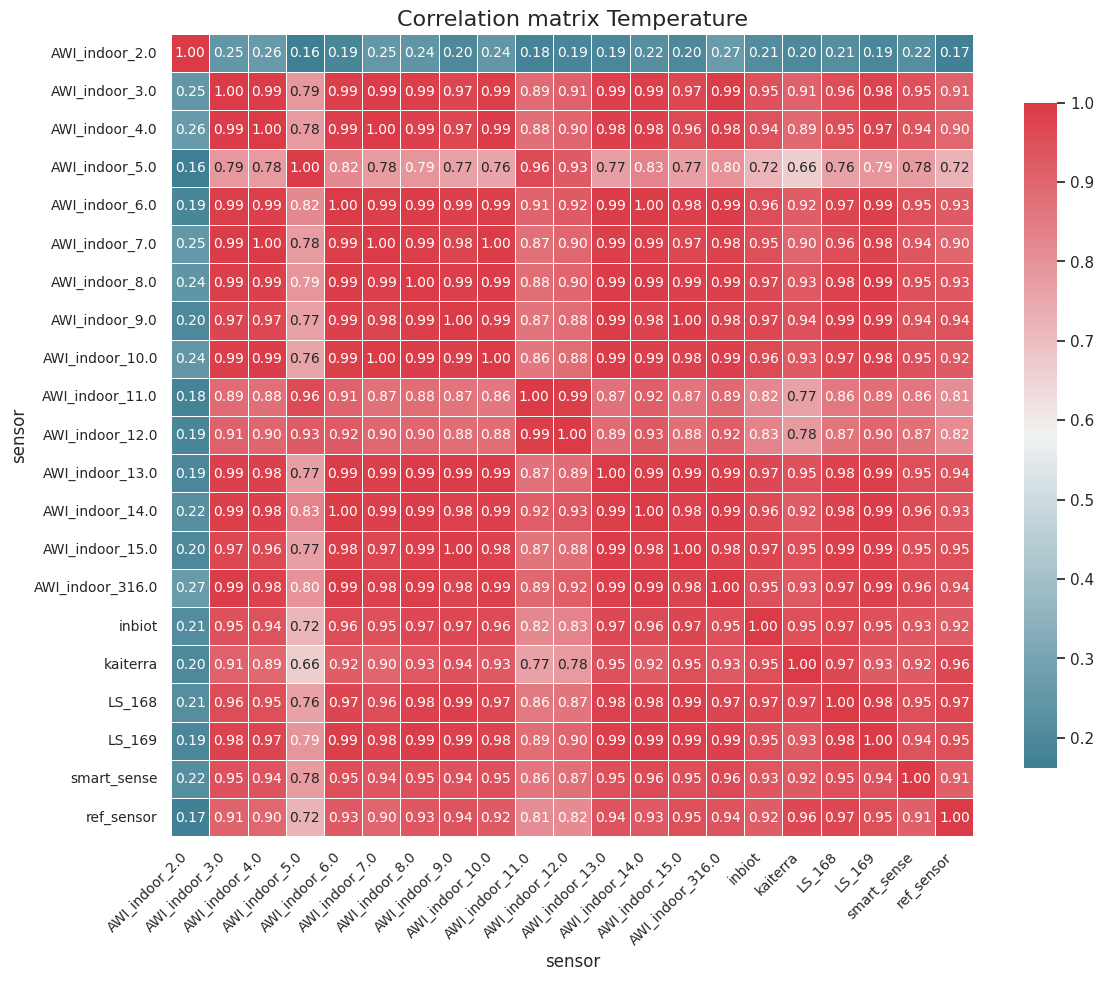

In [6]:
plot_correlation_matrix(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'].corr(),"Correlation matrix Temperature")

## Box plots

In [7]:
plot_boxplot(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'],col_names=['AWI_indoor_2.0','AWI_indoor_15.0','AWI_indoor_316.0','inbiot','LS_168','LS_169','smart_sense','ref_sensor'])

## Time series plot

In [8]:
plot_experiment_range(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'],col_names=['AWI_indoor_316.0','inbiot','kaiterra','LS_168','LS_169','smart_sense','ref_sensor'])

In [9]:
diff_df = transform_diff_avg(pivot_full.resample('240s').mean())
diff_df

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:16: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Doors opened  Hall opened  Indoor Room Air Exchange  \
sensor                                                                  
AWI_indoor_2.0        0.492658    -0.070101                 -0.024699   
AWI_indoor_3.0       -0.631934    -0.160551                 -1.354875   
AWI_indoor_4.0       -0.565227    -0.254779                 -1.169355   
AWI_indoor_5.0       -0.700055    -0.323133                 -1.288458   
AWI_indoor_6.0       -0.527540    -0.214307                 -1.104227   
AWI_indoor_7.0       -0.717843    -0.223127                 -1.119052   
AWI_indoor_8.0       -0.478619    -0.147676                 -0.809745   
AWI_indoor_9.0       -0.511027    -0.100858                 -1.182487   
AWI_indoor_10.0      -0.656398    -0.144466                 -1.402787   
AWI_indoor_11.0      -0.685804    -0.197536                 -1.058014   
AWI_indoor_12.0      -0.583140    -0.149371                 -0.869075   
AWI_indoor_13.0      -0.445215    -0.182943                 -1.007561   
AWI_indoor_14.0      -0.653771    -0.230977                 -1.124749   
AWI_indoor_15.0      -1.024734    -0.350719                 -2.485797   
AWI_indoor_316.0     -0.636736    -0.146148                 -1.269755   
inbiot               -1.045832    -0.271275                 -1.509757   
kaiterra             -1.261503    -0.298656                 -2.006276   
LS_168               -1.286028    -0.366546                 -1.969307   
LS_169               -0.948091    -0.489960                 -1.612994   
smart_sense          -1.207688    -0.273442                 -1.941305   
ref_sensor           -1.986862    -0.804335                 -2.483624   

                  Rowing CD  Rowing OD  Human Presence  Diffuser (Water)  \
sensor                                                                     
AWI_indoor_2.0    -0.036006   0.051706        0.055720         -0.023725   
AWI_indoor_3.0     0.079026  -0.464419        0.041914          0.107070   
AWI_indoor_4.0    -1.299115  -0.449030        0.142735          0.129549   
AWI_indoor_5.0     0.049454  -0.364226       -0.087746         -0.016594   
AWI_indoor_6.0     0.000000  -0.675123        0.050436          0.143014   
AWI_indoor_7.0    -0.940203  -0.687060        0.156815          0.133535   
AWI_indoor_8.0     0.034910  -0.341953        0.050944          0.092095   
AWI_indoor_9.0    -0.394229  -0.777334        0.047744          0.155684   
AWI_indoor_10.0   -0.898072  -0.585858        0.110896          0.174563   
AWI_indoor_11.0    0.128417  -0.351379        0.008582          0.037118   
AWI_indoor_12.0    0.044601  -0.546392        0.074634          0.006852   
AWI_indoor_13.0   -0.267623  -0.497755        0.085114          0.083281   
AWI_indoor_14.0    0.000000  -0.599590        0.029552          0.141928   
AWI_indoor_15.0    0.116462  -1.239502        0.070651          0.275570   
AWI_indoor_316.0   0.095373  -0.007825        0.011452          0.102650   
inbiot             0.109170  -0.869189        0.068199          0.219781   
kaiterra           0.585141  -1.727128       -0.045927          0.223448   
LS_168            -0.237559  -1.101798       -0.018630          0.227117   
LS_169            -0.160195  -0.972471        0.082151          0.167380   
smart_sense       -0.016407  -1.825012        0.064581          0.087957   
ref_sensor        -0.117607  -1.561039       -0.045251          0.146015   

                  Diffuser (Oil)  Car (3m)  Car (5m)  Gas Burner (CD)  \
sensor                                                                  
AWI_indoor_2.0         -0.026162 -0.019062  0.000000         0.014236   
AWI_indoor_3.0         -0.010123 -0.244933 -0.047883         0.303035   
AWI_indoor_4.0         -0.040551 -0.070915  0.040950         0.211557   
AWI_indoor_5.0         -0.119349 -0.374856 -0.136426        -0.772093   
AWI_indoor_6.0         -0.034418 -0.206774 -0.059618         0.106037   
AWI_indoor_7.0         -0.002495 -0.080233  0.050695         0.206259   
AWI_i

### Correlation matrix for diff DataFrame

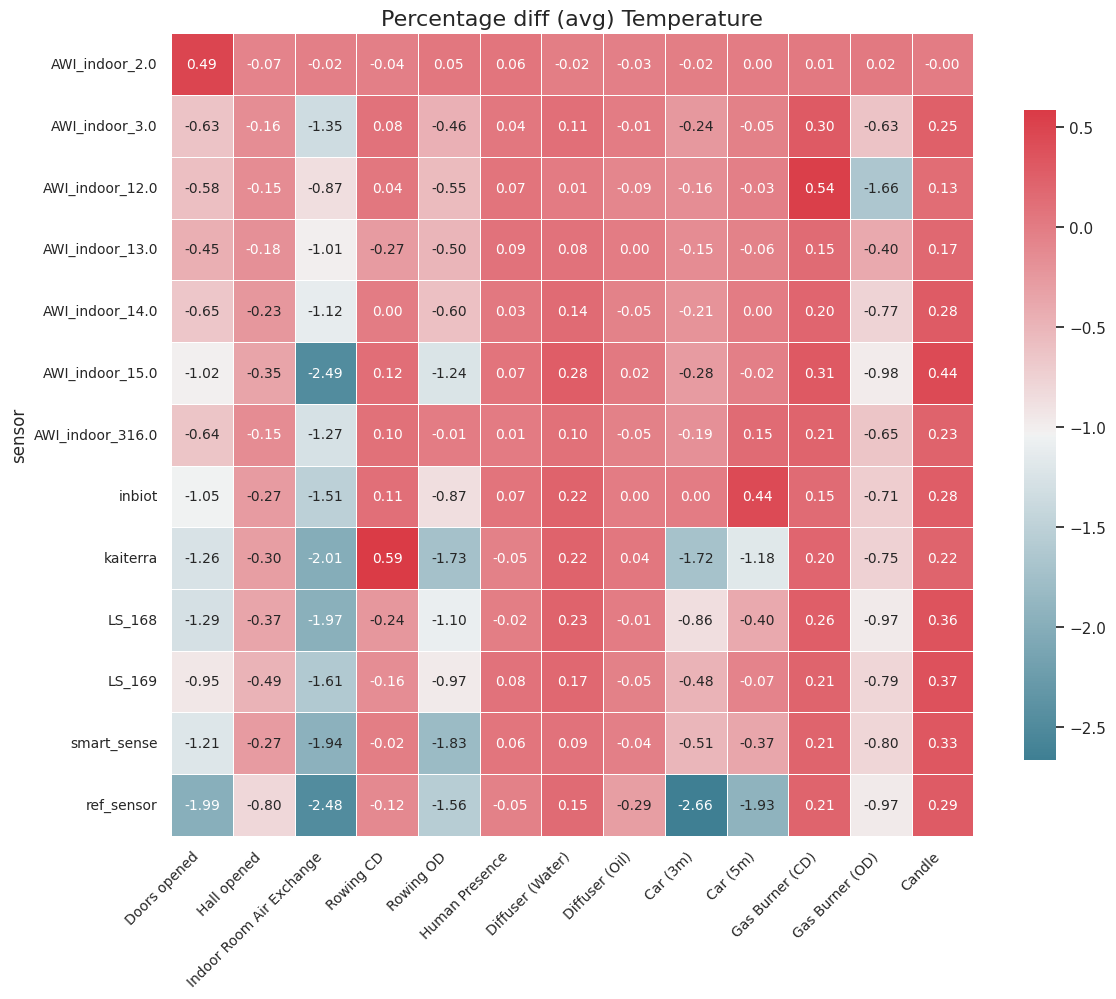

In [10]:
plot_correlation_matrix(diff_df.drop(['AWI_indoor_4.0','AWI_indoor_5.0','AWI_indoor_6.0','AWI_indoor_7.0','AWI_indoor_8.0','AWI_indoor_9.0','AWI_indoor_10.0','AWI_indoor_11.0']),title="Percentage diff (avg) Temperature")

###

In [11]:
df_diff_exp_data = transform_diff_experiments(pivot_full.resample('240s').mean())
df_diff_exp_data

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:37: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 09:16:00        0.628190       -0.008170        0.091547   
2024-10-16 09:20:00        0.390168       -0.281886       -0.111789   
2024-10-16 09:24:00        0.301205       -0.698220       -0.752874   
2024-10-16 09:28:00        0.203429       -1.030677       -1.260892   
2024-10-16 09:32:00        0.280356       -1.271903        0.000000   
...                             ...             ...             ...   
2024-10-20 14:56:00        0.000000        0.204068        0.241751   
2024-10-20 15:00:00        0.000000        0.348585        0.238036   
2024-10-20 15:04:00        0.000000        0.346021        0.365579   
2024-10-20 15:08:00        0.000000        0.252132        0.289530   
2024-10-20 15:12:00        0.000000        0.188212        0.251443   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 09:16:00        0.000000       -0.009925        0.000000   
2024-10-16 09:20:00       -0.155945       -0.218362       -0.120579   
2024-10-16 09:24:00       -0.654041       -0.785835       -0.643863   
2024-10-16 09:28:00       -1.139825       -0.581512       -0.877548   
2024-10-16 09:32:00        0.000000       -0.947963       -0.912558   
...                             ...             ...             ...   
2024-10-20 14:56:00        0.122089        0.233754        0.253093   
2024-10-20 15:00:00        0.200331        0.205224        0.299205   
2024-10-20 15:04:00        0.208623        0.269968        0.279668   
2024-10-20 15:08:00        0.190840        0.176400        0.232407   
2024-10-20 15:12:00        0.112554        0.185357        0.129846   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 09:16:00        0.000000        0.055731         0.059559   
2024-10-16 09:20:00       -0.165960       -0.198044        -0.105820   
2024-10-16 09:24:00       -0.674178       -0.632519        -0.916976   
2024-10-16 09:28:00       -0.610569       -0.923615         0.000000   
2024-10-16 09:32:00       -0.770238       -1.105442        -1.092513   
...                             ...             ...              ...   
2024-10-20 14:56:00        0.222420        0.223414         0.193399   
2024-10-20 15:00:00        0.248557        0.320999         0.227273   
2024-10-20 15:04:00        0.221376        0.275531         0.382071   
2024-10-20 15:08:00        0.185545        0.239319         0.287783   
2024-10-20 15:12:00        0.126407        0.185693         0.268444   

sensor               AWI_indoor_11.0  ...  AWI_indoor_13.0  AWI_indoor_14.0  \
datetime                              ...                                     
2024-10-16 09:16:00         0.012558  ...         0.006167         0.000000   
2024-10-16 09:20:00        -0.226017  ...        -0.126418        -0.196500   
2024-10-16 09:24:00        -0.780267  ...        -0.537186        -0.718795   
2024-10-16 09:28:00        -1.052765  ...        -0.605271        -0.831025   
2024-10-16 09:32:00        -1.272273  ...        -0.824433        -1.041138   
...                              ...  ...              ...              ...   
2024-10-20 14:56:00         0.175778  ...         0.133097         0.291057   
2024-10-20 15:00:00         0.157922  ...         0.230394         0.272623   
2024-10-20 15:04:00         0.236510  ...         0.176819         0.315734   
2024-10-20 15:08:00         0.157301  ...         0.176507         0.236055   
2024-10-20 15:12:00         0.148329  ...         0.126274         0.183166   

sensor               AWI_indoor_15.0  AWI_indoor_316.0    inbiot  kaiterra  \
datetime                                                                     
2024-10-16 09:16:00         0.0

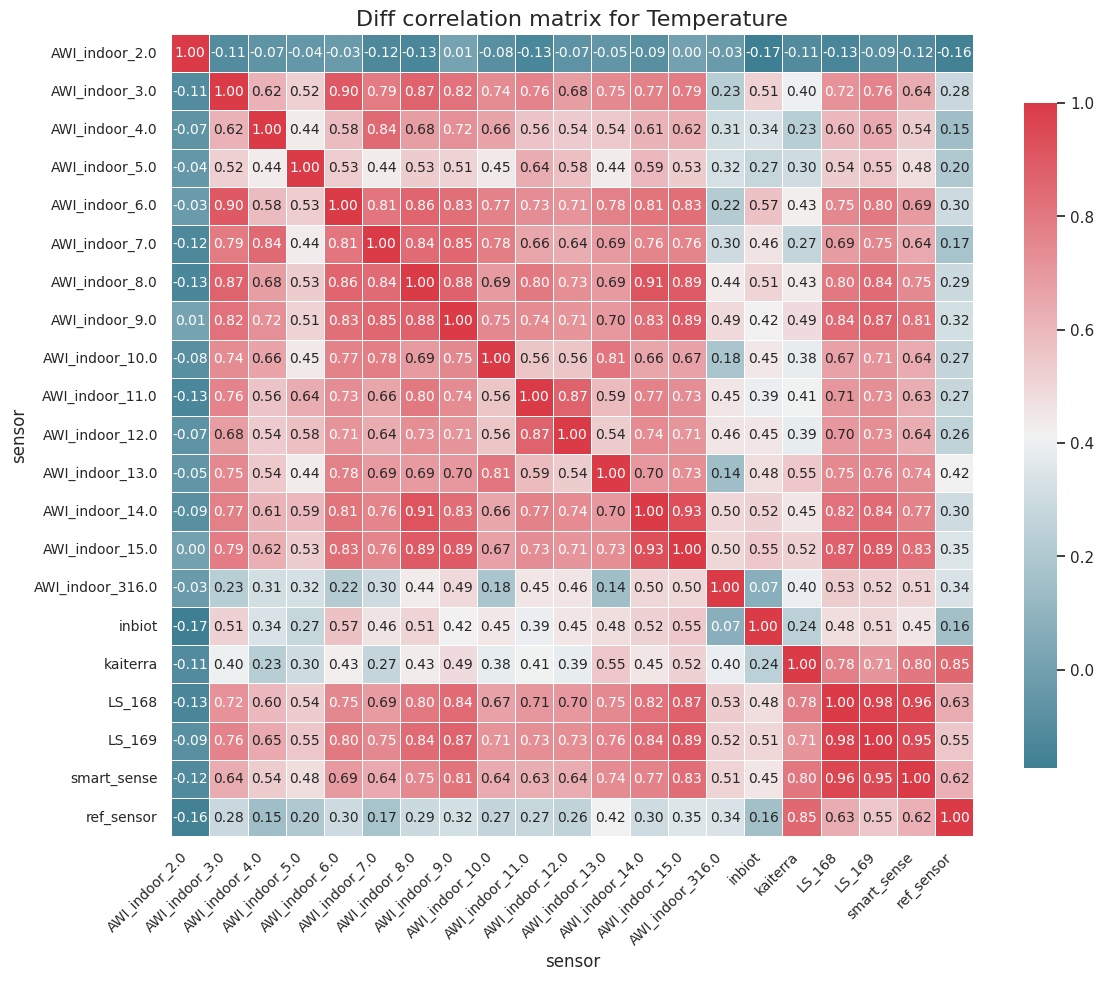

In [12]:
plot_correlation_matrix(df_diff_exp_data.corr(),title="Diff correlation matrix for Temperature")